# Homework 03
## Özlem Ölçer ID: 69217

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-100))

In [2]:
#read data
images = np.genfromtxt('hw02_data_points.csv',delimiter=',')
labels = np.char.strip(np.genfromtxt('hw02_class_labels.csv',delimiter=',',dtype=str),'"').astype(int)


Divide data

In [3]:
x_train = images[:10000,:]  #training set images
y_train = labels[:10000] #training set labels

x_test = images[10000:,:]  #test set images
y_test = labels[10000:]  #test set labels


K = np.amax(y_train) # class size
C = x_train.shape[1] # character size
N_train = y_train.shape[0] # training set size
N_test = y_test.shape[0] # test set size

In [4]:
# Training Set one hot Encoding
y_train_onehot = [[0 for k in range(K)] for n in range(N_train)]

for n in range(N_train):
    y_train_onehot[n][y_train[n]-1] = 1
    
y_train_onehot = np.array(y_train_onehot)

# Test Set one hot Encoding
y_test_onehot = [[0 for k in range(K)] for n in range(N_test)]

for n in range(N_test):
    y_test_onehot[n][y_test[n]-1] = 1
    
y_test_onehot = np.array(y_test_onehot)

In [5]:
eta = 0.00001
iteration_count = 1000

In [6]:
# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [7]:
# define the gradient functions
def gradient_w(x, y_truth, y_predicted):
    return (np.asarray([-np.matmul((y_truth[:, k] - y_predicted[:, k])  * y_predicted[:, k] * (1 - y_predicted[:, k]), x) for k in range(K)]).transpose())

def gradient_w0(y_truth, y_predicted):
    return (-np.sum((y_truth - y_predicted) * y_predicted * (1 - y_predicted), axis = 0))

In [8]:
#initalize w and w0
w = np.genfromtxt('hw02_W_initial.csv',delimiter=',')
w0 = np.genfromtxt('hw02_w0_initial.csv',delimiter=',').reshape(1, 10)

Parameter Estimation

In [9]:
# using gradient descent
iteration = 1
objective_values = []
for i in range(iteration_count):
    y_predicted = sigmoid(x_train, w, w0)

    objective_values = np.append(objective_values, 0.5 * np.sum((y_train_onehot - y_predicted) ** 2))
    w_old = w
    w0_old = w0

    w = w - eta * gradient_w(x_train, y_train_onehot, y_predicted)
    w0 = w0 - eta * gradient_w0(y_train_onehot, y_predicted)
    iteration = iteration + 1
print("w")    
print(w)
print("w0")
print(w0)

w
[[-0.01324798 -0.02823844 -0.00326868 ... -0.04877851  0.01212054
  -0.01143465]
 [-0.01183842 -0.03963016 -0.01295336 ... -0.04034705  0.00400381
  -0.02111644]
 [-0.01998825 -0.03633561 -0.00489235 ... -0.04108662  0.01387463
  -0.02484677]
 ...
 [-0.01341638 -0.0199712  -0.02071762 ... -0.03364511  0.00594223
  -0.01845717]
 [-0.00980747 -0.03218592 -0.02022552 ... -0.03211477  0.01611503
  -0.00845905]
 [-0.01977218 -0.02373074 -0.01468591 ... -0.04159601  0.01068509
  -0.02400039]]
w0
[[-0.01287857 -0.02891159 -0.00873806 -0.03535891 -0.02597275 -0.06542254
  -0.01501564 -0.0451543   0.00689065 -0.01964791]]


Graph of the objective function values throughout the iterations

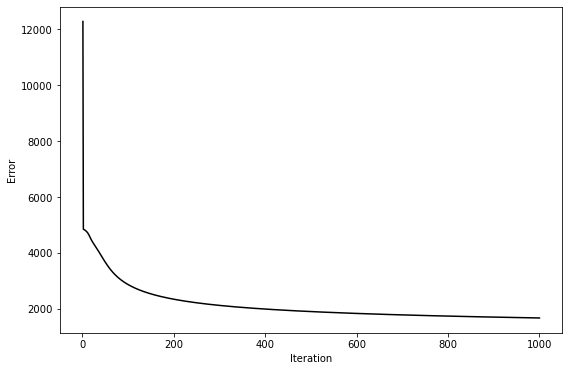

In [10]:
plt.figure(figsize = (9, 6))
plt.plot(range(1, iteration), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

Training Set Confusion Matrix

In [11]:
arr = np.array([1,2,3,4,5,6,7,8,9,10])

In [12]:
y_predicted_max = np.argmax(y_predicted, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted_max, np.sum(y_train_onehot * arr, axis=1), rownames = ['y_pred'], colnames = ['y_train'])

print(confusion_matrix)

y_train   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        838    3   14   44    5    0  220    0    1    0
2          4  908    1   17    4    0    3    0    2    0
3         14   12  645   14   69    0  133    0    9    1
4         89   37    5  870   41    2   55    0   12    2
5          2    6  172   28  763    0  123    0    6    0
6         16    3   26    5    8  841   30   89   25   33
7         27    3   80   28   79    0  423    0   17    0
8          0    0    0    0    0  115    1  862    8   43
9         18    0    8    5   10   13   34    2  892    0
10         1    0    0    1    0   37    0   84    2  957


Test Set Confusion Matrix

In [13]:
y_predicted_test = sigmoid(x_test, w, w0)

y_predicted_test_max = np.argmax(y_predicted_test, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted_test_max, np.sum(y_test_onehot * arr, axis=1), rownames = ['y_pred'], colnames = ['y_test'])
print(confusion_matrix)

y_test   1    2    3    4    5    6    7    8    9    10
y_pred                                                  
1       397    1   11   22    0    1  129    0    0    0
2         4  459    0    8    3    0    1    0    0    0
3         7   10  320    6   49    1   52    0    5    0
4        51   15    3  443   19    1   31    0   10    0
5         2    2   83   14  382    0   58    0    1    0
6         9    2   13    2    4  405   12   39   14   18
7        14    1   50   11   47    0  218    0    9    0
8         1    0    0    0    0   47    0  387    7   27
9        16    0   10    1    2    7   18    1  459    0
10        1    0    0    0    0   28    0   44    3  472
